#Giorgio Mendoza
#CS539-F23-F02
#Dr. J. Sethi
#Lab: Week 7: SciKit

# Lab_3-0: Statistics and Machine Learning
Please answer the questions by filling in the code where indicated below.


## Scikit: Machine learning in python
[Scikit-learn](<http://scikit-learn.org/stable/>) is a machine learning library for Python. It features various classification, regression and clustering algorithms. In this lab, we will go over these algorithms and how they can be applied to different datasets.

If scikit-learn is not installed on your platform, you can run the following command in the virtual machine to install it:

`pip install -U numpy scipy scikit-learn`

Two packages used closely together with scikit-learn are **numpy** and **matplotlib**.

## Numpy
[NumPy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. Among other things, it contains:
* a powerful N-dimensional array object and sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Manipulating numpy arrays is an important part of doing machine learning in Python. Below, we show a few basic things you can do with numpy arrays; here is [a tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial) that goes into more detail about numpy.

In [ ]:
import numpy as np

# Generate a random array
X = np.random.random((2,6)) # a 2 x 6 array
print(X)

# Accessing elements

# get a single element
print(X[0,0])

# get a single row
print(X[1])

# get a column
print(X[:, 1])

# Transpose of an array
print(X.T)

[[0.46205466 0.90864014 0.20051687 0.42183083 0.10056527 0.93517116]
 [0.25712024 0.71202194 0.84859698 0.17777152 0.16129342 0.26172095]]
0.4620546621862105
[0.25712024 0.71202194 0.84859698 0.17777152 0.16129342 0.26172095]
[0.90864014 0.71202194]
[[0.46205466 0.25712024]
 [0.90864014 0.71202194]
 [0.20051687 0.84859698]
 [0.42183083 0.17777152]
 [0.10056527 0.16129342]
 [0.93517116 0.26172095]]


## MatPlotLib
Another important part of machine learning is visualization of data. The most common tool for this in Python is *matplotlib*.  We've seen this in previous labs but we will go over the basic operations again.

Populating the interactive namespace from numpy and matplotlib


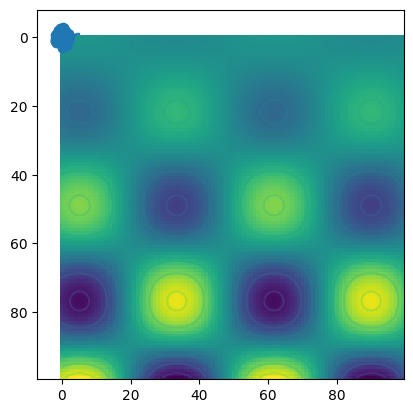

In [ ]:
# Start pylab inline mode, so figures will appear in the notebook
%pylab inline
import matplotlib.pyplot as plt

# plot a line
# np.linspace() creates a 1-dimensional array containing, in this case, 200 evenly spaced numbers from 0 to 5
# np.linspace() is very commonly used to create the x-axis data points for plotting as shown below
X = np.linspace(0,5,200)
y = np.sin(X)
plt.plot(X, y)


# scatter-plot points
# np.random.normal will create an array containing 300 numbers drawn from the normal distribution

X = np.random.normal(size = 300)
y = np.random.normal(size = 300)
plt.scatter(X,y)


# showing images
# np.newaxis() simply adds another dimension to the data of size.

X = np.linspace(1,12,100)
y = X[:, np.newaxis]

im = y * np.sin(X) * np.cos(y)

# imshow - the origin is at the top-left
plt.imshow(im)

# contour plot - the origin is at the bottom-left
plt.contour(im)

## Goal of Lab
By the end of this section, you should:
* Know what sort of tasks qualify as Machine Learning problems
* See some examples of machine learning algorithms
* Know the basics of creating and manipulating numpy arrays and scatter plots in matplotlib


# Part 1: Loading data

## The Iris dataset
We will take a look at the Iris dataset provided by scikit-learn. The data consists of measurements of three different species of irises: (i) Iris Setosa, (ii) Iris Versicolour, and (iii) Iris Virginica.

The data is stored in a CSV file and contains the following features (sepal and petal are both parts of a flower):
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

In [ ]:
# The iris dataset is loaded into Scikit as an example dataset
# Loading the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# The resulting dataset is a Bunch object (https://github.com/dsc/bunch) (similar to a dictionary or a map):
# you can see what's available using the method keys()
iris.keys()

# Printing the number of samples and features for the dataset
n_samples, n_features = iris.data.shape
print('Number of samples = ', n_samples)
print('Number of features = ', n_features)

# Printing the features and class (target) label for 6 data samples
Samples = [0,50,6,100,10,20]
for i in Samples:
    sample_features = iris.data[i]
    sample_class_index = iris.target[i]
    sample_class_name = iris.target_names[sample_class_index]
    print(sample_features, sample_class_name)

Number of samples =  150
Number of features =  4
[5.1 3.5 1.4 0.2] setosa
[7.  3.2 4.7 1.4] versicolor
[4.6 3.4 1.4 0.3] setosa
[6.3 3.3 6.  2.5] virginica
[5.4 3.7 1.5 0.2] setosa
[5.4 3.4 1.7 0.2] setosa


## Exercise 1: Other datasets in scikit-learn
Scikit-learn comes with more small standard datasets.

* **fetch_california_housing()** Load and return the California house prices dataset
* **load_diabetes()** Load and return the diabetes dataset
* **load_digits([n_class])** Load and return the digits dataset

For these datasets:
- Load the California house prices dataset. Print the number of samples and features.
- List five of the dataset features and their description (Hint: look at the DESCR key in the dataset).
- Finally, generate a scatter plot where the X axis corresponds to one of the features you listed and the y axis to the price of the houses. Your plot should have the right title and axis labels.

Number of samples =  20640
Number of features =  8
.. _california_housing_dataset:

California Housing dataset
--------------------------

MedInc: 
HouseAge:     :Number of Instances: 20640
AveRooms: 
AveBedrms:     :Number of Attributes: 8 numeric, predictive attributes and the target
Population: 


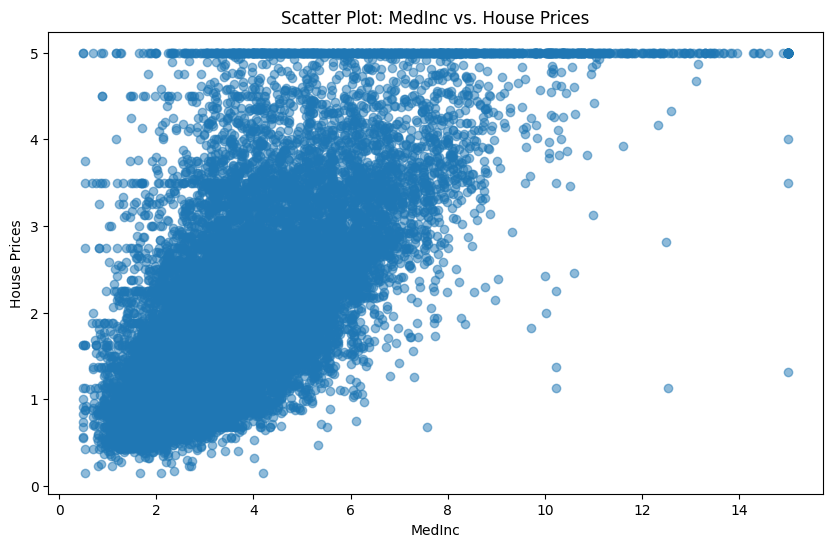

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

#load California house prices dataset
california_housing = fetch_california_housing()

#print number of samples and features
n_samples, n_features = california_housing.data.shape
print('Number of samples = ', n_samples)
print('Number of features = ', n_features)

#list five dataset features & descriptions
feature_names = california_housing.feature_names[:5]
data = california_housing.DESCR.split('\n')  # Split description into list of strings
#access & print elements from rows 1 to 4
for line in data[0:5]:
    print(line)
feature_descriptions = california_housing.DESCR.split('\n')[6:11]  # Description of the first 5 features
for i in range(5):
    print(f'{feature_names[i]}: {feature_descriptions[i]}')

#feature for the X-axis, target as Y-axis (house prices)
chosen_feature_index = 0
chosen_feature_name = feature_names[chosen_feature_index]

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(california_housing.data[:, chosen_feature_index], california_housing.target, alpha=0.5)
plt.title(f'Scatter Plot: {chosen_feature_name} vs. House Prices')
plt.xlabel(chosen_feature_name)
plt.ylabel('House Prices')
plt.show()


# Part 2: Supervised Learning
In supervised learning, we have a dataset consisting of both features (indepdenent variables) and labels (dependent variable). The task is to construct an estimator which is able to predict the label of an object given the set of features. The label can take either numeric (regression) or categorical
(classification) values.

## Part 2.1: Linear Regression

Previously, we saw **linear regression**. We will now see an example of linear regression on the diabetes dataset from scikit.

Coefficients: [938.23786125]
Residual sum of squares: 2548.07


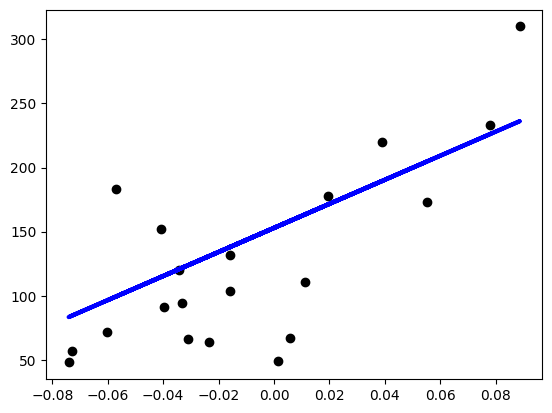

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

#diabetes dataset
diabetes = load_diabetes()

#array containing just second feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:,:,2]

#split data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

#split targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

#linear regression object
regr = LinearRegression()

#train model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

#coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

# Predict the values of unseen items
predicted_targets = regr.predict(diabetes_X_test)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, predicted_targets , color='blue',
         linewidth=3)

plt.show()

As we can see, we don't really have very good prediction here - the blue line are the predicted values, whereas the black dots are the actual values. In other words, this single feature does not seem that predictive.

## Exercise 2: Prediction error when using more features
We ran linear regression using only one feature. Now we will run linear regression with all the features in the dataset.

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

## Exercise 2.1:

Calculate and print the mean squared error (as we did above with just 1 feature). Did using all the available features improve the estimator's performance?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

#diabetes dataset
diabetes = load_diabetes()

#split data into training/testing sets
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]

#split targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

#linear regression object
regr = LinearRegression()

#train model using training sets
regr.fit(diabetes_X_train, diabetes_y_train)

#predict values of unseen items
predicted_targets = regr.predict(diabetes_X_test)

#calculate & print mean squared error
mse = mean_squared_error(diabetes_y_test, predicted_targets)
print("Mean Squared Error with all features:", mse)


Mean Squared Error with all features: 2004.5186863342092


In the previous result, where only one feature was used for linear regression, the model had a coefficient of approximately 938.24 and a residual sum of squares of approximately 2548.07. The residual sum of squares is a measure of the model's error, and a lower value is better.

In the current result, where we used all the available features for linear regression, the model's mean squared error (MSE) is approximately 2004.52. MSE measures the average squared differences between the predicted and actual values, and in this case, a lower MSE is better as well.

Comparing the two results:

Using all features resulted in a lower MSE (2004.52) compared to using just one feature (2548.07).
The coefficient value is not directly comparable between the two models because the number of features and their relationship to the target variable have changed.
The decrease in MSE when using all available features suggests that the model with multiple features performs better in terms of prediction accuracy. It's a good sign that including more informative features improved the estimator's performance in this context.

## Feature Selection

In this part, you will use feature selection to find the optimal number of features to be used for this prediction task. The classes in the sklearn.feature_selection module can be used for feature selection on sample sets to improve the estimators' accuracy. Here, we will use [Recursive feature elimination](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE).

In [ ]:
# Import recursive feature elimination

from sklearn.feature_selection import RFE

# Create the RFE object using two features and rank the features for the diabetes datasets
rfe = RFE(estimator=regr, n_features_to_select=2, step=1)
rfe.fit(diabetes_X_train,diabetes_y_train)
print(rfe.ranking_)

[9 5 1 4 2 3 7 6 1 8]


## Exercise 2.2
For this exercise, please:
* Calculate and print the mean squared error when using two features.
* Is it better to use all the features (i.e., a more complex model), or does using fewer features (i.e., a simpler model) lead to an estimator of higher accuracy?
* Plot the mean squared error when using feature selection for 1 to 10 features. What is the optimal number of features to be used?

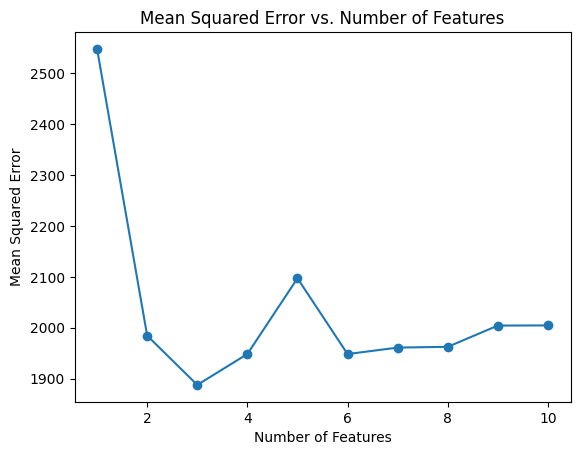

Optimal number of features: 3


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#create variables to store MSE values and feature counts
mse_values = []
num_features = list(range(1, 11))  #selecting 1 to 10 features

for n in num_features:
    #create RFE object with specified number of features
    rfe = RFE(estimator=regr, n_features_to_select=n, step=1)
    rfe.fit(diabetes_X_train, diabetes_y_train)

    #select features using RFE
    selected_features = rfe.support_
    diabetes_X_train_rfe = diabetes_X_train[:, selected_features]
    diabetes_X_test_rfe = diabetes_X_test[:, selected_features]

    #create new linear regression model
    regr_rfe = LinearRegression()

    #train model with selected features
    regr_rfe.fit(diabetes_X_train_rfe, diabetes_y_train)

    #predict values of unseen items
    predicted_targets_rfe = regr_rfe.predict(diabetes_X_test_rfe)

    #calculate mean squared error
    mse = mean_squared_error(diabetes_y_test, predicted_targets_rfe)

    #append MSE to list
    mse_values.append(mse)

# plot MSE values for different numbers of features
plt.plot(num_features, mse_values, marker='o')
plt.title("Mean Squared Error vs. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error")
plt.show()

#get optimal number of features (lowest MSE)
optimal_num_features = num_features[mse_values.index(min(mse_values))]
print("Optimal number of features:", optimal_num_features)


In this case, the code determined that the optimal number of features is 3. This means that selecting 3 features leads to the lowest MSE and, theoretically, the most accurate estimator on the given dataset.

Selecting fewer features can sometimes result in a more robust and interpretable model, as it reduces the risk of overfitting, especially when dealing with high-dimensional data.

# Part 3: Linear regression on the California house prices dataset.

Now you need to perform linear regression on the housing data you loaded and explored in Exercise 1.

## Exercise 3.1:
You will train a set of linear regression estimators to predict the house prices in California. Using all the available features, train different linear regression models for the following training-test data splits:
- 20% training, 80% testing
- 40% training, 60% testing
- 60% training, 40% testing
- 80% training, 20% testing

Then, plot the mean squared error for the different configurations.

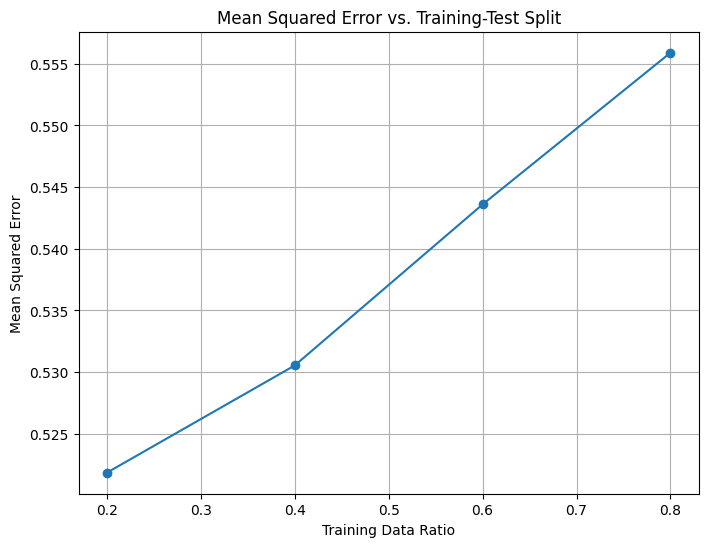

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#california housing dataset
california_housing = fetch_california_housing()

#get data & target
X = california_housing.data
y = california_housing.target

#define training-test splits
splits = [0.2, 0.4, 0.6, 0.8]

#lists to store MSE values for each split
mse_values = []

#loop through different training-test data splits
for split in splits:
    #split data into training & testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split, random_state=42)

    #create & train a linear regression model
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    #predict values on the test set
    y_pred = regr.predict(X_test)

    #calculate mean squared error for this split
    mse = mean_squared_error(y_test, y_pred)

    mse_values.append(mse)

#plot the mean squared error for different training-test data splits
plt.figure(figsize=(8, 6))
plt.plot(splits, mse_values, marker='o')
plt.title("Mean Squared Error vs. Training-Test Split")
plt.xlabel("Training Data Ratio")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


## Exercise 3.2:
Use recursive feature evaluation to find the best set of features for prediction. Which are these? Using exactly the same training-test splits you used in Exercise 3.1, plot the mean squared error for a linear regression model that uses only the set of features you found in the first part of this question.

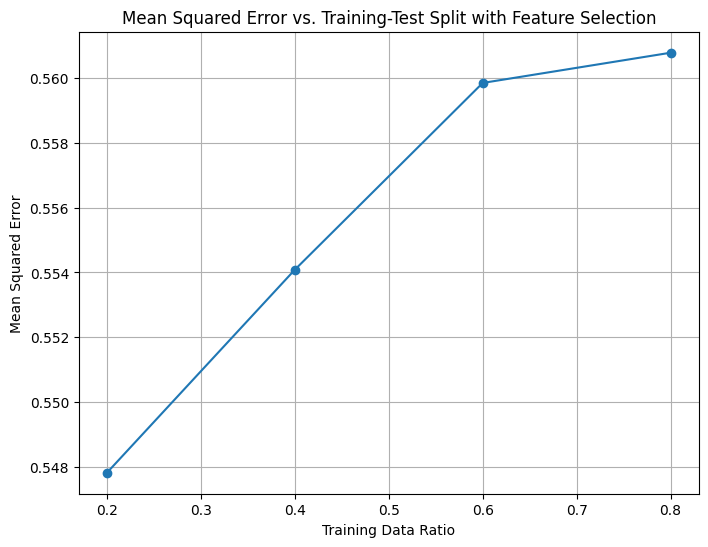

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

california_housing = fetch_california_housing()

#get data & target
X = california_housing.data
y = california_housing.target

#define training-test splits
splits = [0.2, 0.4, 0.6, 0.8]

#lists to store MSE values for each split
mse_values = []

#loop through different training-test data splits
for split in splits:
    #split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split, random_state=42)

    #linear Regression model
    regr = LinearRegression()

    #use RFE to find best set of features
    num_features_to_select = 3  # Change this to your desired number of features
    rfe = RFE(estimator=regr, n_features_to_select=num_features_to_select)
    rfe.fit(X_train, y_train)
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    #train model on selected features
    regr.fit(X_train_rfe, y_train)

    #predict values on test set
    y_pred = regr.predict(X_test_rfe)

    #get mean squared error for this split
    mse = mean_squared_error(y_test, y_pred)

    mse_values.append(mse)

#plot mean squared error for different training-test data splits
plt.figure(figsize=(8, 6))
plt.plot(splits, mse_values, marker='o')
plt.title("Mean Squared Error vs. Training-Test Split with Feature Selection")
plt.xlabel("Training Data Ratio")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


A positive slope in the plot suggests that as we increase the amount of training data (higher training ratio), the MSE tends to increase. In other words, as we use a smaller portion of the data for training (e.g., 20% training, 80% testing), the model's performance may degrade, resulting in a higher MSE. This can indicate that the model struggles to generalize well with limited training data.

# Part 4: Classification

Now, we can move to classification, an instance of supervised machine learning that corresponds to identifying to which of a set of **categories** a new observation belongs. We will see how scikit-learn can be used to perform classification on synthetic data.

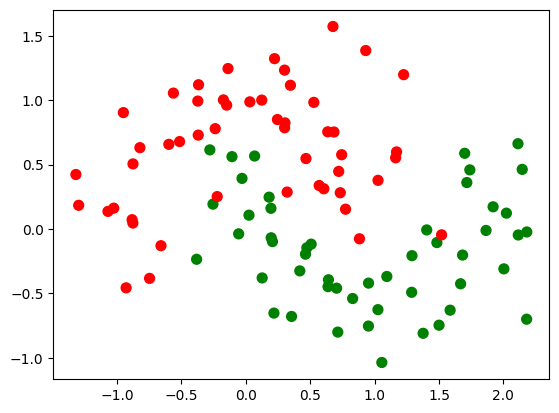

In [ ]:
# Import synthetic data generator
from sklearn.datasets import make_classification, make_moons

# Generate synthetic dataset
X_temp, y_temp = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=1, n_classes=2)
X, y = make_moons(noise=0.3, random_state=0)

# Plot synthetic dataset
colormap = np.array(['r', 'g'])
plt.scatter(X[:,0],X[:,1],marker='o',c=colormap[y], s=50)
plt.show()

# Split synthetic dataset into training and test data
X_train = X[:-20,:]
X_test = X[-20:,:]

y_train = y[:-20]
y_test = y[-20:]

To perform the actual classification, we will use [support vector machines](http://en.wikipedia.org/wiki/Support_vector_machine). In particular, we will use both **linear SVMs**, that try to separate the data without performing any transformation on the feature values, and **non-linear SVMs**, which try to separate the data after performing a non-linear transformation on the feature values:

In [ ]:
# Import SVM
from sklearn import svm

# Create linear SVM
clf_linear = svm.SVC(kernel='linear')

# Fit linear SVM
clf_linear.fit(X_train, y_train)

# Predict class for testing data
pred = clf_linear.predict(X_test)

# Calculate prediction error for testing data
errors = 0.0
for i in range(len(pred)):
    if pred[i] != y_test[i]:
        errors += 1.0
print("Test data errors = ",errors, "out of", len(pred), "predictions")

# Calculate prediction error for all points
total_pred = clf_linear.predict(X)
errors = 0.0
for i in range(len(total_pred)):
    if total_pred[i] != y[i]:
        errors += 1.0
print("Total errors = ",errors, "out of", len(total_pred), "predictions")

Test data errors =  2.0 out of 20 predictions
Total errors =  15.0 out of 100 predictions


Let's see how the linear SVM separated the space:

<ipython-input-21-130349e4e703>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pylab.scatter(X[:,0],X[:,1],c=colormap[y], s=50,cmap=pylab.cm.Paired)


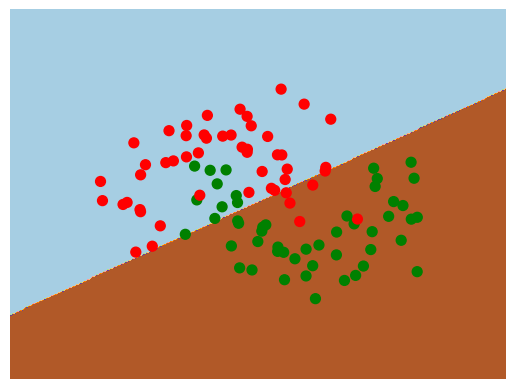

In [ ]:
# create a mesh to plot in
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# put the result into a color plot
Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pylab.contourf(xx,yy,Z,cmap=pylab.cm.Paired)
pylab.axis('off')

# plot the data points
pylab.scatter(X[:,0],X[:,1],c=colormap[y], s=50,cmap=pylab.cm.Paired)


Next, we will use a non-linear SVM for the previous classification task. We evaluate the performance of the new classifier and plot the space separation as above.

Test data errors =  0.0 out of 20 predictions
Total errors =  6.0 out of 100 predictions


<ipython-input-22-355ac75263de>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pylab.scatter(X[:,0],X[:,1],c=colormap[y], s=50,cmap=pylab.cm.Paired)


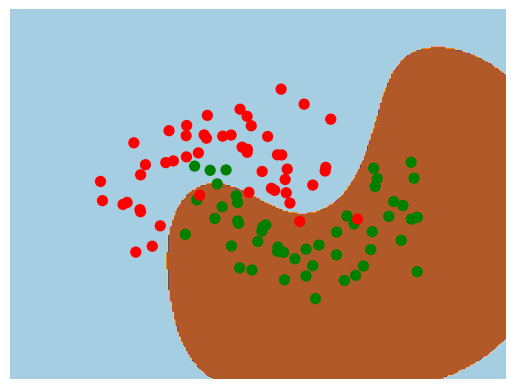

In [ ]:
# Create non-linear SVM using the Radial Basis Kernel function
clf_non_linear = svm.SVC(kernel='rbf')

# Fit the svm
clf_non_linear.fit(X_train,y_train)

# Calculate prediction error for testing data
pred = clf_non_linear.predict(X_test)
errors = 0.0
for i in range(len(pred)):
    if pred[i] != y_test[i]:
        errors += 1.0
print("Test data errors = ",errors, "out of", len(pred), "predictions")

# Calculate prediction error for all points
total_pred = clf_non_linear.predict(X)
errors = 0.0
for i in range(len(total_pred)):
    if total_pred[i] != y[i]:
        errors += 1.0
print("Total errors = ",errors, "out of", len(total_pred), "predictions")

# create a mesh to plot in
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# put the result into a color plot
Z = clf_non_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pylab.contourf(xx,yy,Z,cmap=pylab.cm.Paired)
pylab.axis('off')

# plot the data points
pylab.scatter(X[:,0],X[:,1],c=colormap[y], s=50,cmap=pylab.cm.Paired)

## Classification on the Iris dataset

**Part 1:** Load the iris dataset presented above. Split the dataset in two sets, one for training and one for testing. You should use 80% of the data for training and 20% percent for testing. Perform classification on the test data using a linear and non-linear SVM, calculate the classification error on the testing data and the whole dataset.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#split dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create a linear SVM classifier
clf_linear = svm.SVC(kernel='linear')
# Fit the linear SVM on the training data
clf_linear.fit(X_train, y_train)

#create a non-linear SVM classifier with Radial Basis Function (RBF) kernel
clf_non_linear = svm.SVC(kernel='rbf')
# Fit non-linear SVM on training data
clf_non_linear.fit(X_train, y_train)

#calculate prediction error for testing data (linear SVM)
y_pred_linear = clf_linear.predict(X_test)
test_error_linear = 1 - accuracy_score(y_test, y_pred_linear)

#get prediction error for testing data (non-linear SVM)
y_pred_non_linear = clf_non_linear.predict(X_test)
test_error_non_linear = 1 - accuracy_score(y_test, y_pred_non_linear)

#get prediction error for entire dataset (linear SVM)
total_pred_linear = clf_linear.predict(X)
total_error_linear = 1 - accuracy_score(y, total_pred_linear)

#get prediction error for entire dataset (non-linear SVM)
total_pred_non_linear = clf_non_linear.predict(X)
total_error_non_linear = 1 - accuracy_score(y, total_pred_non_linear)

#print classification errors
print("Linear SVM Test Data Error:", test_error_linear)
print("Non-linear SVM Test Data Error:", test_error_non_linear)
print("Linear SVM Total Error:", total_error_linear)
print("Non-linear SVM Total Error:", total_error_non_linear)


Linear SVM Test Data Error: 0.0
Non-linear SVM Test Data Error: 0.0
Linear SVM Total Error: 0.020000000000000018
Non-linear SVM Total Error: 0.020000000000000018


**Part 2:** Apart from SVMs there are many more classifiers in scikit-learn.

Some choices are:
* sklearn.neighbors.NeighborsClassifier : k-Nearest Neighbors classifier based on the ball tree datastructure for low dimensional data and brute force search for high dimensional data
* sklearn.tree.DecisionTreeClassifier : A classifier based on a series of binary decisions. This is another very fast classifier, which can be very powerful.

Use the DecisionTreeClassifier, import it, and use the ? feature to learn about it. Then instantiate this model (similar steps to SVC) and apply it to the Iris dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

#fit DecisionTreeClassifier on training data
clf.fit(X_train, y_train)

#get prediction error for testing data
y_pred = clf.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred)

#get prediction error for entire dataset
total_pred = clf.predict(X)
total_error = 1 - accuracy_score(y, total_pred)

#print classification errors
print("Decision Tree Test Data Error:", test_error)
print("Decision Tree Total Error:", total_error)


Decision Tree Test Data Error: 0.0
Decision Tree Total Error: 0.0


Since the error is so low, I decided to skip the optional task below.

**Optional:** Use feature selection as before to find the best set of

1.   List item
2.   List item

features for classification.

In [ ]:
# YOUR CODE HERE

# Part 5: Unsupervised Learning
Unsupervised learning addresses a different problem. Here the data has no labels, and we are interested in finding *similarities* between the objects in question. You can think of unsupervised learning as a means of discovering labels for the data itself. Next, we focus on clustering.

## Clustering
Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar to each other than to those in other groups. A list of clustering algorithms can be found [here](http://en.wikipedia.org/wiki/Cluster_analysis#Algorithms). In this lab, we will focus on a simple yet very effective clustering algorithm named **k-means clustering**. [K-means](http://en.wikipedia.org/wiki/K-means_clustering) aims to partition *n* observations into *k* clusters in which each observation belongs to the cluster with the nearest mean (centroid), serving as a prototype of the cluster.

Next, we provide an example of k-means clustering on synthetic data.

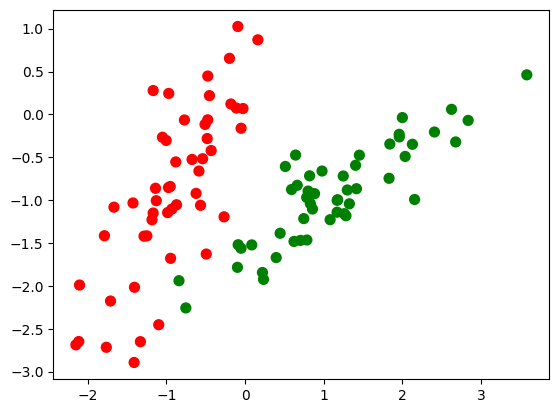

In [ ]:
# Import synthetic data generator
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=5, n_classes=2)

# Plot synthetic dataset
plt.scatter(X[:,0],X[:,1],marker='o',c=colormap[y], s=50)
plt.show()

Now let's run the k-means algorithm:

In [ ]:
# Import kmeans algorithm and clustering evaluation metrics
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(init='random', n_clusters = 2, n_init=10)
kmeans.fit(X)

# Evaluate clusters: see http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure for more details

# Homogeneity score: evaluates if each cluster contains only memebers of a single class
print("Homogeneity_score = ",metrics.homogeneity_score(y,kmeans.labels_))

# Completeness score: evaluates if all members of a given class are assigned to the same cluster
print("Completeness_score = ",metrics.completeness_score(y,kmeans.labels_))

Homogeneity_score =  0.5706951008986033
Completeness_score =  0.5814792765981478


Next, we plot the clusters and the centroids.

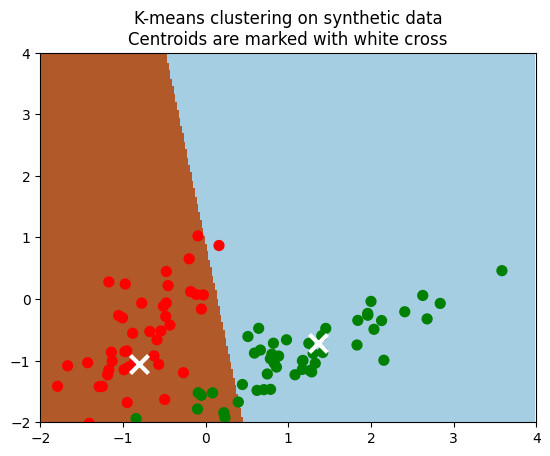

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
h = .02
x_min, x_max = -2, 4
y_min, y_max = -2, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(X[:,0],X[:,1],marker='o',c=colormap[y], s=50)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means clustering on synthetic data\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## Exercise 5: Clustering the Iris data
Apply the k-means algorithm on the Iris dataset. Compare its performance with that of the non-linear SVM and decision tree classifiers using all available features. You can use the homogeneity and completeness metrics presneted above to perform this comparison.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

#get homogeneity and completeness for k-means clustering
kmeans_homogeneity = metrics.homogeneity_score(y, kmeans.labels_)
kmeans_completeness = metrics.completeness_score(y, kmeans.labels_)

#train non-linear SVM classifier
clf_svm = SVC(kernel='rbf', C=1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

#get homogeneity and completeness for non-linear SVM
svm_homogeneity = metrics.homogeneity_score(y_test, y_pred_svm)
svm_completeness = metrics.completeness_score(y_test, y_pred_svm)

#train Decision Tree classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

#get homogeneity and completeness for Decision Tree
tree_homogeneity = metrics.homogeneity_score(y_test, y_pred_tree)
tree_completeness = metrics.completeness_score(y_test, y_pred_tree)

print("K-means Clustering - Homogeneity:", kmeans_homogeneity)
print("K-means Clustering - Completeness:", kmeans_completeness)
print("Non-linear SVM - Homogeneity:", svm_homogeneity)
print("Non-linear SVM - Completeness:", svm_completeness)
print("Decision Tree - Homogeneity:", tree_homogeneity)
print("Decision Tree - Completeness:", tree_completeness)


K-means Clustering - Homogeneity: 0.7514854021988338
K-means Clustering - Completeness: 0.7649861514489815
Non-linear SVM - Homogeneity: 1.0
Non-linear SVM - Completeness: 1.0
Decision Tree - Homogeneity: 1.0
Decision Tree - Completeness: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
